In [1]:
import pandas as pd
from dotenv import load_dotenv
load_dotenv('../../extractors/.env')

True

In [2]:
metrics = pd.read_csv("../data/metrics_all_models.csv")
metrics

,index,threshold,value,highlight_ratio
0,f1,7.302340e-02,0.188285,preds_labels_10_perc
1,accuracy,9.999661e-01,0.907263,preds_labels_10_perc
2,precision,9.917676e-01,0.248408,preds_labels_10_perc
3,recall,3.358031e-08,1.000000,preds_labels_10_perc
4,kappa,6.668185e-01,0.090101,preds_labels_10_perc
...,...,...,...,...
429,kappa_top5,8.052601e-01,0.000000,preds_labels_sports_model_on_comedy_vids_30_perc
430,precision_top5,8.052601e-01,0.355556,preds_labels_sports_model_on_comedy_vids_30_perc
431,recall_top5,8.052601e-01,1.000000,preds_labels_sports_model_on_comedy_vids_30_perc
432,roc_auc_top5,NaN,0.459052,preds_labels_sports_model_on_comedy_vids_30_perc


# AP vs share of highlights

In [3]:
metrics['highlights_share'] = metrics['highlight_ratio'].apply(lambda x: '_'.join(x.split('_')[-2:])).apply(lambda x: '3_perc' if 'epochs' in x else x)
metrics_perc = metrics[(metrics['highlights_share'].apply(lambda x: 'std' not in x)) & (metrics['index'] == 'average_precision')]
metrics_perc['highlights_share_num'] = metrics_perc['highlights_share'].apply(lambda x: int(x.split('_')[0]))
metrics_perc['category'] = metrics_perc['highlight_ratio'].apply(lambda x: 'comedy' if 'comedy' in x else 'sports')
metrics_perc

C:\Users\jzmuj\AppData\Local\Temp\ipykernel_29420\939792940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_perc['highlights_share_num'] = metrics_perc['highlights_share'].apply(lambda x: int(x.split('_')[0]))
C:\Users\jzmuj\AppData\Local\Temp\ipykernel_29420\939792940.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_perc['category'] = metrics_perc['highlight_ratio'].apply(lambda x: 'comedy' if 'comedy' in x else 'sports')


,index,threshold,value,highlight_ratio,highlights_share,highlights_share_num,category
6,average_precision,NaN,0.129459,preds_labels_10_perc,10_perc,10,sports
20,average_precision,NaN,0.190677,preds_labels_15_perc,15_perc,15,sports
62,average_precision,NaN,0.213430,preds_labels_20_perc,20_perc,20,sports
76,average_precision,NaN,0.241969,preds_labels_25_perc,25_perc,25,sports
118,average_precision,NaN,0.322803,preds_labels_30_perc,30_perc,30,sports
132,average_precision,NaN,0.140089,preds_labels_3_perc_1k_epochs,3_perc,3,sports
146,average_precision,NaN,0.067212,preds_labels_3_perc_20_epochs,3_perc,3,sports
160,average_precision,NaN,0.126923,preds_labels_comedy_10_perc,10_perc,10,comedy
174,average_precision,NaN,0.209299,preds_labels_comedy_15_perc,15_perc,15,comedy
216,average_precision,NaN,0.252007,preds_labels_comedy_20_perc,20_perc,20,comedy


Text(2, 0.2, 'y = x')

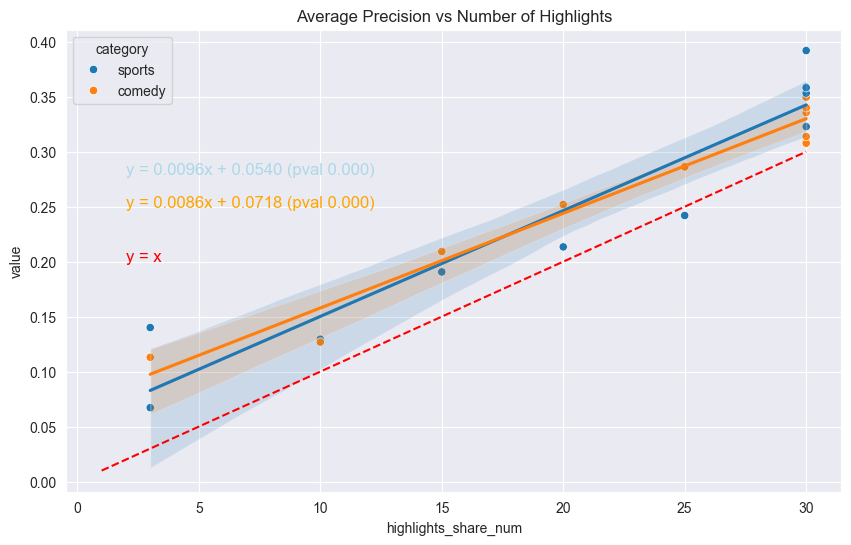

In [4]:
# plot value vs highlight_share_num on scatterplot.
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# sns.set_theme()
# sns.set_context("talk")
# sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=metrics_perc, x='highlights_share_num', y='value', hue='category')
plt.xlabel('Number of highlights')
plt.ylabel('Average Precision')
plt.title('Average Precision vs Share of Highlights')
# set axis range: y to [0,1] x to [0, 100]
# plt.ylim(0, 1)
# plt.xlim(0, 100)
# fit a line
s = sns.regplot(data=metrics_perc[metrics_perc['category'] == 'sports'], x='highlights_share_num', y='value', scatter=False)
c = sns.regplot(data=metrics_perc[metrics_perc['category'] == 'comedy'], x='highlights_share_num', y='value', scatter=False)
# display the line equation
# slope, intercept, r_value, p_value, std_err =stats.linregress(x=p.get_lines()[0].get_xdata() ,y=p.get_lines()[0].get_ydata())
# plt.text(2, 0.38, f'y = {slope:.4f}x + {intercept:.4f}', fontsize=12)

slope_s, intercept_s, _, pval_s, _ =stats.linregress(x=metrics_perc[metrics_perc['category'] == 'sports']['highlights_share_num'] ,y=metrics_perc[metrics_perc['category'] == 'sports']['value'])
slope_c, intercept_c, _, pval_c, _ =stats.linregress(x=metrics_perc[metrics_perc['category'] == 'comedy']['highlights_share_num'] ,y=metrics_perc[metrics_perc['category'] == 'comedy']['value'])
plt.text(2, 0.28, f'y = {slope_s:.4f}x + {intercept_s:.4f} (pval {pval_s:.3f})', fontsize=12, color='lightblue')
plt.text(2, 0.25, f'y = {slope_c:.4f}x + {intercept_c:.4f} (pval {pval_c:.3f})', fontsize=12, color='orange')
plt.plot([1, 30], [.01, .3], color='red', label='y=x', linestyle='dashed')
# dashed 
plt.text(2, 0.2, 'y = x', fontsize=12, color='red')

In [5]:
metrics['highlights_share'] = metrics['highlight_ratio'].apply(lambda x: '_'.join(x.split('_')[-2:])).apply(lambda x: '3_perc' if 'epochs' in x else x)
metrics_perc = metrics[(metrics['highlights_share'].apply(lambda x: 'std' not in x)) & (metrics['index'] == 'average_precision_top5')]
metrics_perc['highlights_share_num'] = metrics_perc['highlights_share'].apply(lambda x: int(x.split('_')[0]))
metrics_perc['category'] = metrics_perc['highlight_ratio'].apply(lambda x: 'comedy' if 'comedy' in x else 'sports')
metrics_perc

C:\Users\jzmuj\AppData\Local\Temp\ipykernel_29420\4251505260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_perc['highlights_share_num'] = metrics_perc['highlights_share'].apply(lambda x: int(x.split('_')[0]))
C:\Users\jzmuj\AppData\Local\Temp\ipykernel_29420\4251505260.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_perc['category'] = metrics_perc['highlight_ratio'].apply(lambda x: 'comedy' if 'comedy' in x else 'sports')


,index,threshold,value,highlight_ratio,highlights_share,highlights_share_num,category
13,average_precision_top5,NaN,0.243900,preds_labels_10_perc,10_perc,10,sports
27,average_precision_top5,NaN,0.519450,preds_labels_15_perc,15_perc,15,sports
69,average_precision_top5,NaN,0.432466,preds_labels_20_perc,20_perc,20,sports
83,average_precision_top5,NaN,0.349986,preds_labels_25_perc,25_perc,25,sports
125,average_precision_top5,NaN,0.658278,preds_labels_30_perc,30_perc,30,sports
139,average_precision_top5,NaN,0.687974,preds_labels_3_perc_1k_epochs,3_perc,3,sports
153,average_precision_top5,NaN,0.066388,preds_labels_3_perc_20_epochs,3_perc,3,sports
167,average_precision_top5,NaN,0.219606,preds_labels_comedy_10_perc,10_perc,10,comedy
181,average_precision_top5,NaN,0.460697,preds_labels_comedy_15_perc,15_perc,15,comedy
223,average_precision_top5,NaN,0.448494,preds_labels_comedy_20_perc,20_perc,20,comedy


Text(2, 0.7, 'y = x')

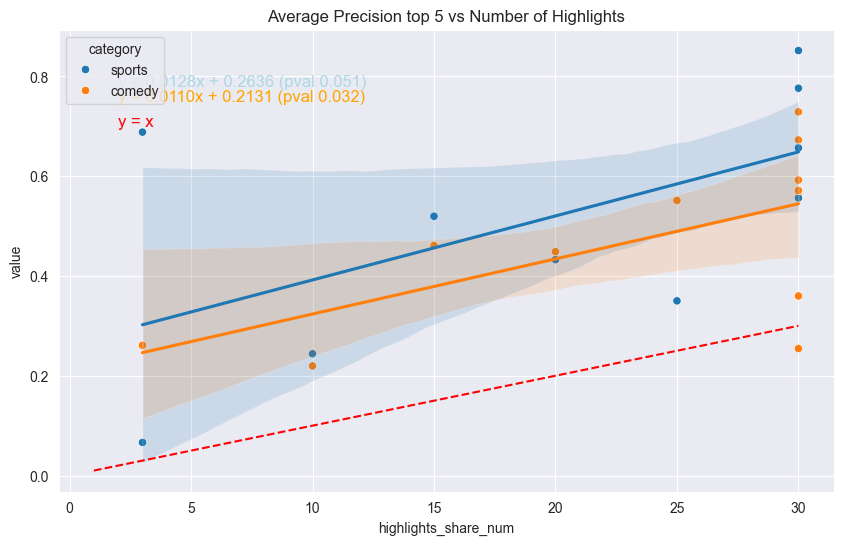

In [6]:
# plot value vs highlight_share_num on scatterplot.
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# sns.set_theme()
# sns.set_context("talk")
# sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=metrics_perc, x='highlights_share_num', y='value', hue='category')
plt.xlabel('Number of highlights')
plt.ylabel('Average Precision')
plt.title('Average Precision top 5 vs Share of Highlights')
# set axis range: y to [0,1] x to [0, 100]
# plt.ylim(0, 1)
# plt.xlim(0, 100)
# fit a line
s = sns.regplot(data=metrics_perc[metrics_perc['category'] == 'sports'], x='highlights_share_num', y='value', scatter=False)
c = sns.regplot(data=metrics_perc[metrics_perc['category'] == 'comedy'], x='highlights_share_num', y='value', scatter=False)
# display the line equation
# slope, intercept, r_value, p_value, std_err =stats.linregress(x=p.get_lines()[0].get_xdata() ,y=p.get_lines()[0].get_ydata())
# plt.text(2, 0.38, f'y = {slope:.4f}x + {intercept:.4f}', fontsize=12)

slope_s, intercept_s, _, pval_s, _ =stats.linregress(x=metrics_perc[metrics_perc['category'] == 'sports']['highlights_share_num'] ,y=metrics_perc[metrics_perc['category'] == 'sports']['value'])
slope_c, intercept_c, _, pval_c, _ =stats.linregress(x=metrics_perc[metrics_perc['category'] == 'comedy']['highlights_share_num'] ,y=metrics_perc[metrics_perc['category'] == 'comedy']['value'])
plt.text(2, 0.78, f'y = {slope_s:.4f}x + {intercept_s:.4f} (pval {pval_s:.3f})', fontsize=12, color='lightblue')
plt.text(2, 0.75, f'y = {slope_c:.4f}x + {intercept_c:.4f} (pval {pval_c:.3f})', fontsize=12, color='orange')
plt.plot([1, 30], [.01, .3], color='red', label='y=x', linestyle='dashed')
# dashed 
plt.text(2, 0.7, 'y = x', fontsize=12, color='red')

In [7]:
import pandas as pd
#data/videos/24/UCdcUmdOxMrhRjKMw-BX19AA/brsmungVdYc
path = "data/videos/17/UCRijo3ddMTht_IHyNSNXpNQ/S9KxqRUcnCU"
import boto3
boto3.resource("s3").Bucket("auto-shorts").download_file(f"{path}/video.mp4", "video.mp4")
# extract audio from mp4, to create waveform plot
import moviepy.editor as mp
clip = mp.VideoFileClip("video.mp4")
clip.audio.write_audiofile("audio.wav")

MoviePy - Writing audio in audio.wav


MoviePy - Done.


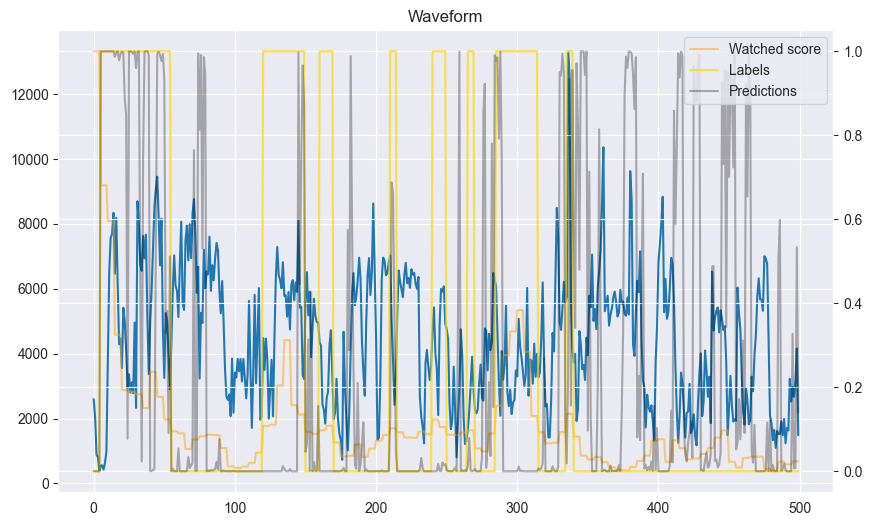

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import math

file = 'audio.wav'
fig, ax1 = plt.subplots(figsize=(10, 6))
with wave.open(file,'r') as wav_file:
    num_channels = wav_file.getnchannels()
    frame_rate = wav_file.getframerate()
    downsample = math.ceil(frame_rate * num_channels / 2)  # Get two samples per second!

    process_chunk_size = 600000 - (600000 % frame_rate)

    signal = None
    waveform = np.array([])

    while signal is None or signal.size > 0:
        signal = np.frombuffer(wav_file.readframes(process_chunk_size), dtype='int16')

        # Convert signal to float to handle NaN padding
        signal = signal.astype(float)

        # Take mean of absolute values per 0.5 seconds
        sub_waveform = np.nanmean(
            np.pad(np.abs(signal), (0, ((downsample - (signal.size % downsample)) % downsample)), mode='constant', constant_values=np.NaN).reshape(-1, downsample),
            axis=1
        )

        waveform = np.concatenate((waveform, sub_waveform))

    # Resample waveform to always have exactly 500 elements
    x_original = np.linspace(0, len(waveform) - 1, num=len(waveform))
    x_resampled = np.linspace(0, len(waveform) - 1, num=500)
    waveform_resampled = np.interp(x_resampled, x_original, waveform)

    # Plot
    #plt.figure(1)
    plt.title('Waveform')
    ax1.plot(waveform_resampled, label='Waveform')
    
    
import json 
boto3.resource("s3").Bucket("auto-shorts").download_file(f"{path}/video_data.json", "video_data.json")
with open("video_data.json") as f:
    moments = pd.DataFrame(
                    json.load(f)["most_watched_moments"]
                )
watched_score = pd.concat([moments, moments.assign(time_start_ms=moments['time_start_ms']+1), moments.assign(time_start_ms=moments['time_start_ms']+2), moments.assign(time_start_ms=moments['time_start_ms']+3), moments.assign(time_start_ms=moments['time_start_ms']+4)]).sort_values('time_start_ms').reset_index()['intensity_score']
ax2 = ax1.twinx()
ax2.plot(watched_score, color='orange', label="Watched score", alpha=0.5)
if '/24/' in path:
    boto3.resource("s3").Bucket("auto-shorts").download_file('data/preds_labels_comedy_30_perc.json', 'labels.json')
else:
    boto3.resource("s3").Bucket("auto-shorts").download_file('data/preds_labels_30_perc.json', 'labels.json')
df = pd.read_json(f"labels.json")
col = path.split('/')[-1]
ax2.plot(df[col]['labels'], alpha=0.7, color='gold', label="Labels")
ax2.plot(df[col]['preds'], alpha=0.3, color='black', label="Predictions")
plt.legend(loc='upper right')

In [9]:
df.columns

Index(['OocRG_9aT3g', 'OPzh8SUnu-4', 'p39rR4nLJV0', 'P8V_bx0L4RY',
       'PBokg31iFAs', 'piyk0iI9E6Q', 'pPmllgDFQVI', 'Pw3_CyFFsXQ',
       'q9bX7EkMvrA', 'qkRUcYHJ1JI', 'QtSMXXJq11Q', 'QuncAUHpl-8',
       'qUUloBe5vEo', 'QxV2Uj17e8Y', 'RdNqmKrRmbU', 'rQWb_oYS1tg',
       'rRsoSIJtKJs', 'RrxdB1VpYWo', 'S9KxqRUcnCU'],
      dtype='object')